In [ ]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import train_cluster_cifar_tf as IFCA

import numpy as np
import random

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [ ]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
random.seed(42)
seeds = random.sample(range(10000), 3)
p_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [6]:
import train_cluster_cifar_dfca_tf as DFCA
import json
import time
import torch
import numpy as np


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, Participation Rate: 0.1, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 10, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}
Using device: cuda
finding good initializer from train data
Epoch -1 tr: l 4.676 a 0.111  clct[np.int64(0), np.int64(20)] ans[np.int64(10), np.int64(10)] cl_acc 0.500 3.097sec
Epoch -1 tr: l 4.677 a 0.096  clct[np.int64(18), np.int64(2)] ans[np.int64(12), np.int64(8)] cl_acc 0.500 3.028sec
Epoch -1 tr: l 4.670 a 0.083  clct[np.int64(0), np.int64(20)] ans[np.int64(7), np.int64(13)] cl_acc 0.650 3.037sec
Epoch -1 tr: l 4.676 a 0.088  clct[np.int64(2), np.int64(18)] ans[np.int64(8), np.int64(12)] cl_acc 0.700 2.878sec
Epoch -1 tr: l 4.675 a 0.100  clct[np.int64(5), np.int64(15)] ans[np.int64(12), np.int64(8)] cl_acc 0.550 2.771sec
Epoch -1 tr: l 4.673 a 0.105  clct[np.int64(17), np.int64(3

Running the ifca experiment

In [12]:
import train_cluster_cifar_tf as IFCA
import json
import time
import torch
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


with open("config_pn.json", "r") as read_file:
    config = json.load(read_file)

for pr in p_rates:
    res_final = []
    config['participation_rate'] = pr

    for seed in seeds:
        tf.reset_default_graph()
        print(f"---------------------------------IFCA, Participation Rate: {pr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



---------------------------------IFCA, Participation Rate: 0.1, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.1, 'num_epochs': 10, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}
Using device: cuda
finding good initializer from train data
actual [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
pred [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
Epoch -1 tr: l 4.677 a 0.121  clct[np.int64(11), np.int64(9)] ans[np.int64(10), np.int64(10)] cl_acc 0.650000 3.219sec
found good initializer
actual [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
pred [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
Epoch -1 tr: l 4.677 a 0.121  clct[np.int64(11), np.int64(9)] ans[np.int64(12), np.int64(8)] cl_acc 0.650000 3.117sec
actual [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Plots

DFCA-GI Test Acc:  [[0.10401666666666666, 0.29466666666666663, 0.3664, 0.4343666666666666, 0.42486666666666667, 0.4704, 0.49061666666666665, 0.46885, 0.5037166666666666, 0.5092333333333333, 0.4969666666666667], [0.09558333333333334, 0.3753333333333333, 0.45730000000000004, 0.49795000000000006, 0.5280833333333333, 0.5446166666666667, 0.5595, 0.5510666666666667, 0.5684166666666667, 0.5793499999999999, 0.5934499999999999], [0.1033, 0.41773333333333335, 0.4940333333333333, 0.5412, 0.5666, 0.588, 0.5971666666666667, 0.6197166666666667, 0.6348333333333334, 0.6434333333333334, 0.6560666666666667], [0.0982, 0.4148833333333333, 0.5063666666666666, 0.5723166666666667, 0.5886166666666667, 0.6273833333333334, 0.6322333333333333, 0.6540333333333334, 0.6418, 0.6588666666666667, 0.6694833333333333], [0.10118333333333333, 0.4719333333333333, 0.5759, 0.6153333333333334, 0.6150833333333333, 0.6446833333333333, 0.6359666666666667, 0.6482666666666667, 0.6478166666666666, 0.6591333333333335, 0.676366666666

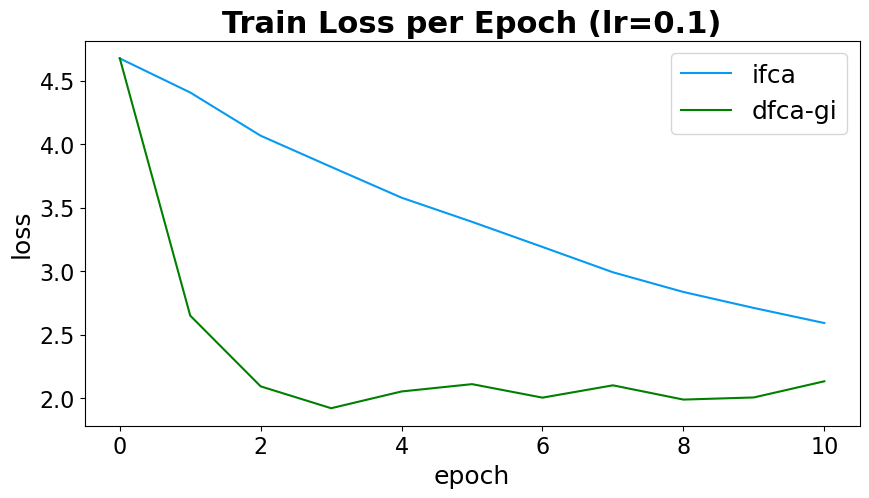

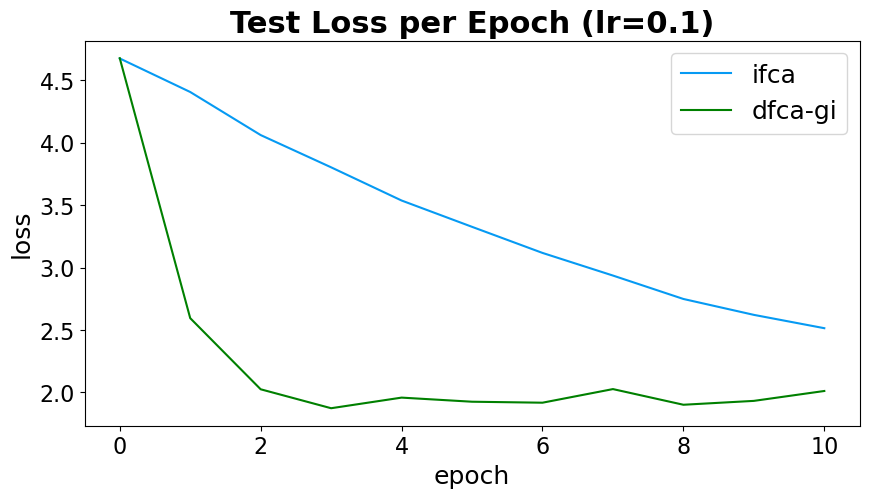

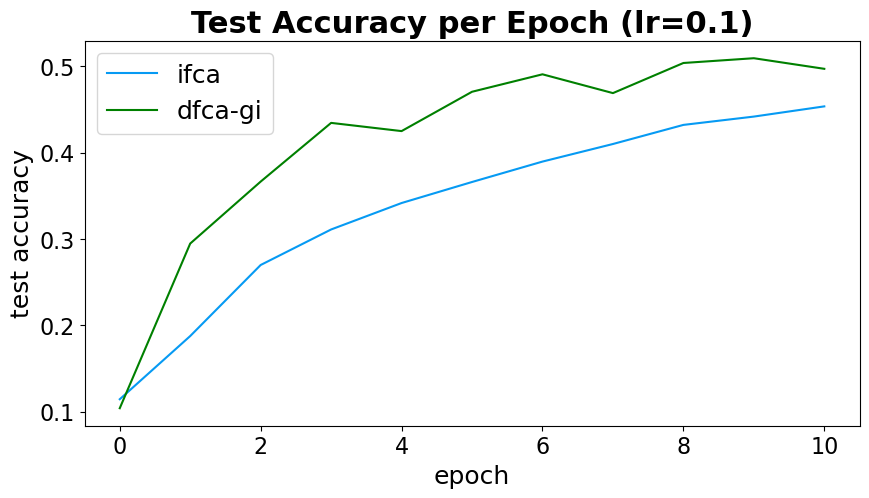

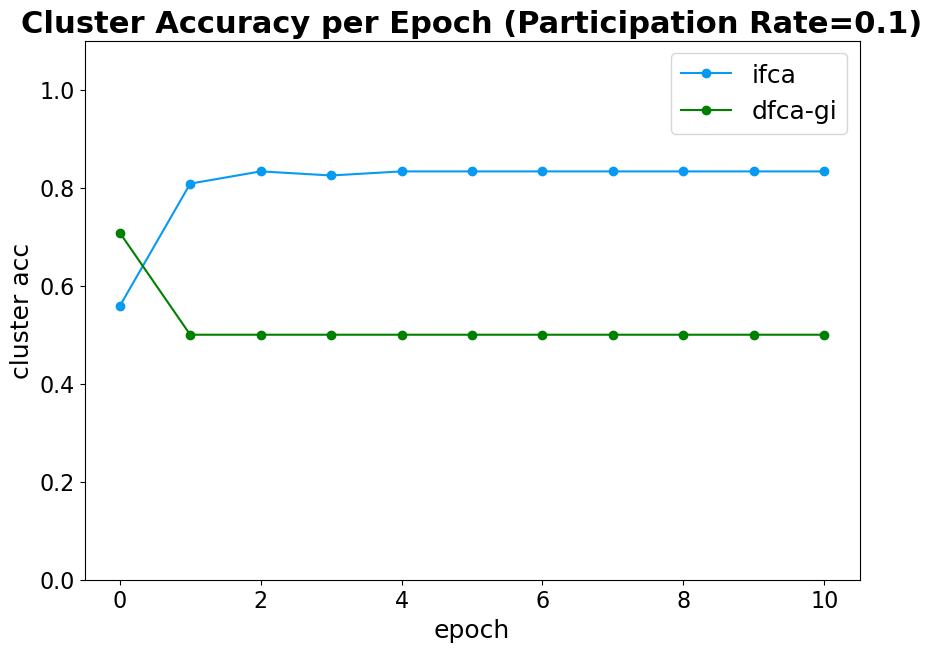

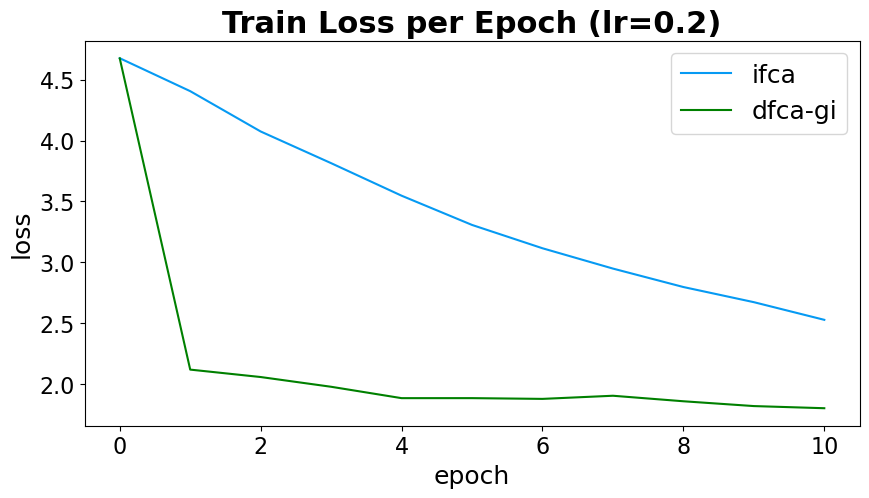

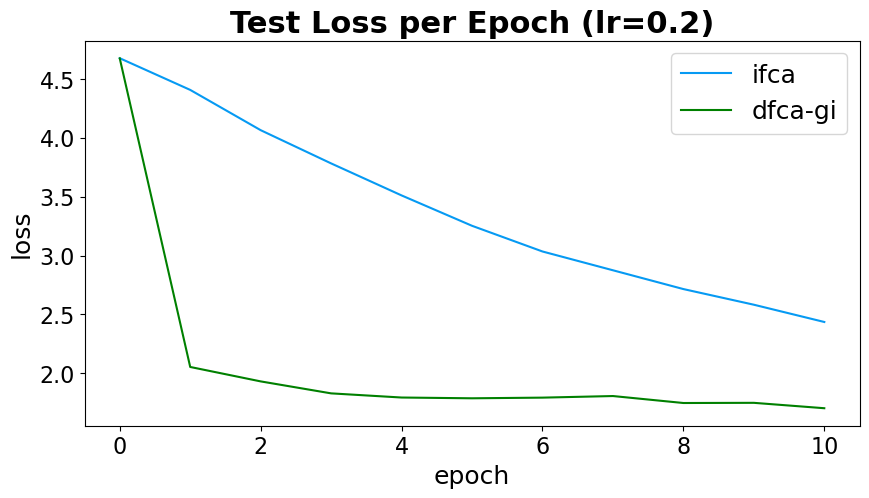

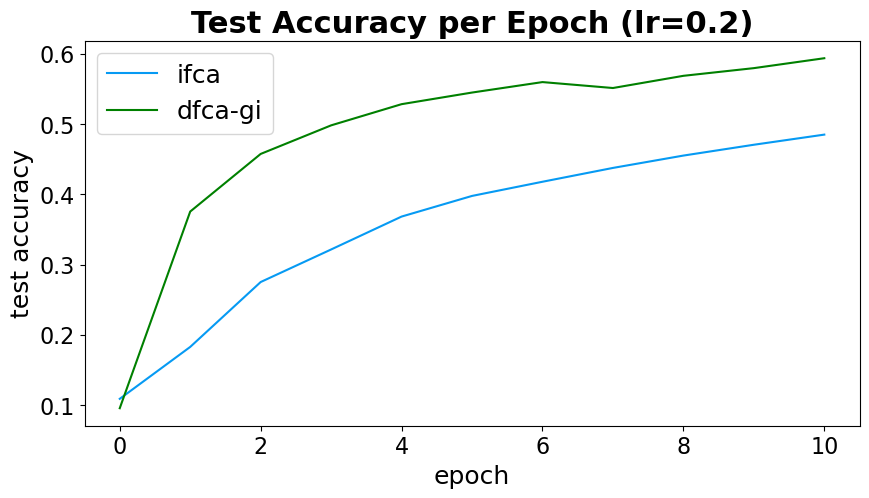

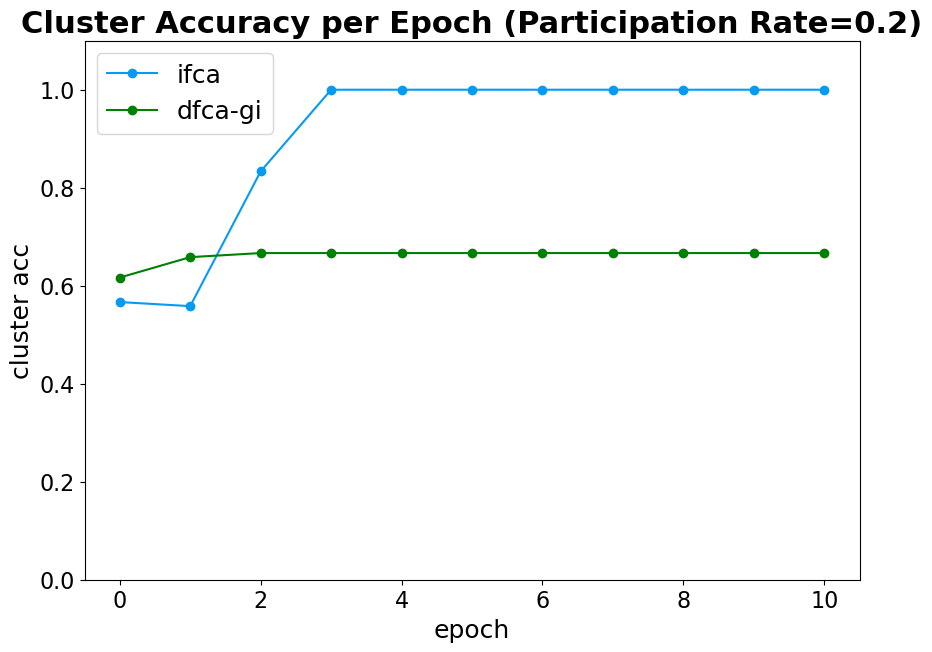

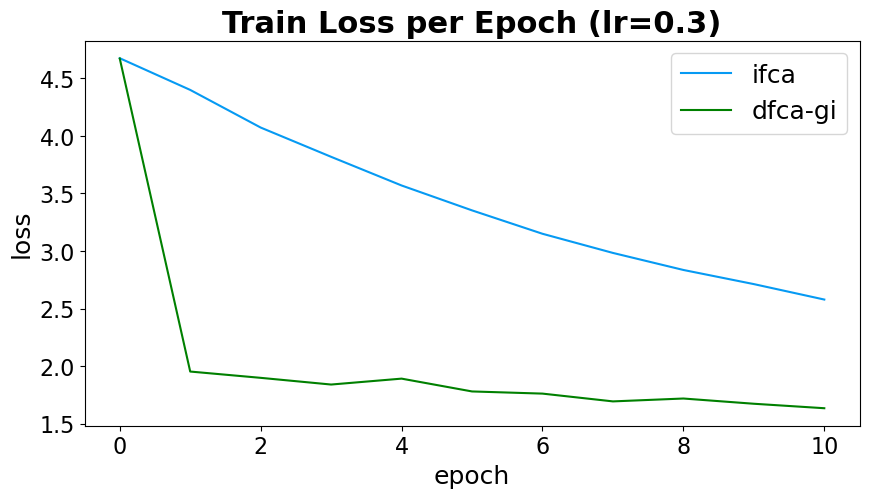

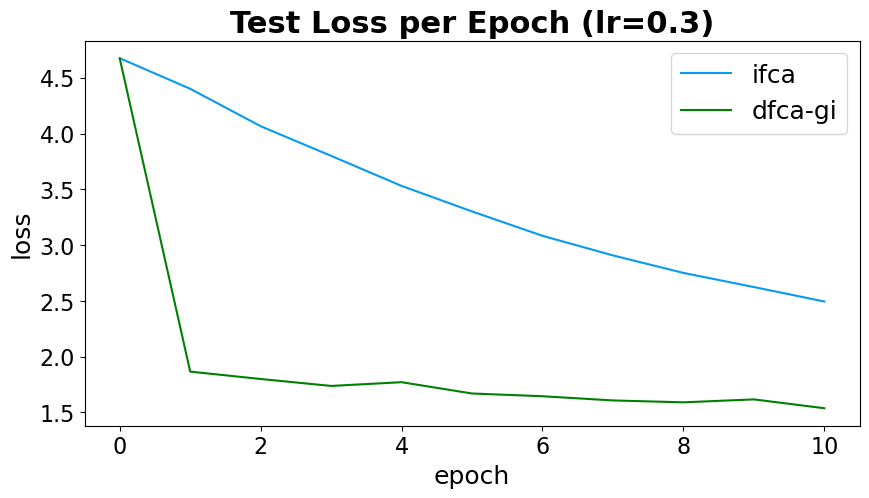

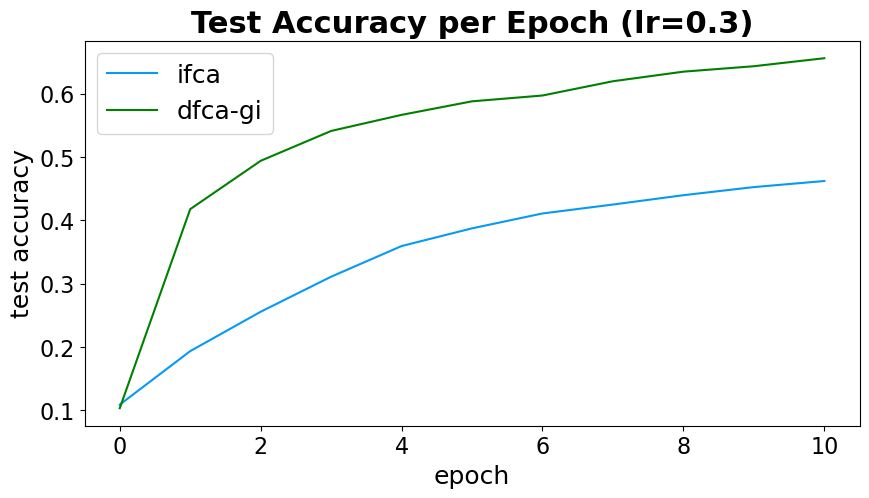

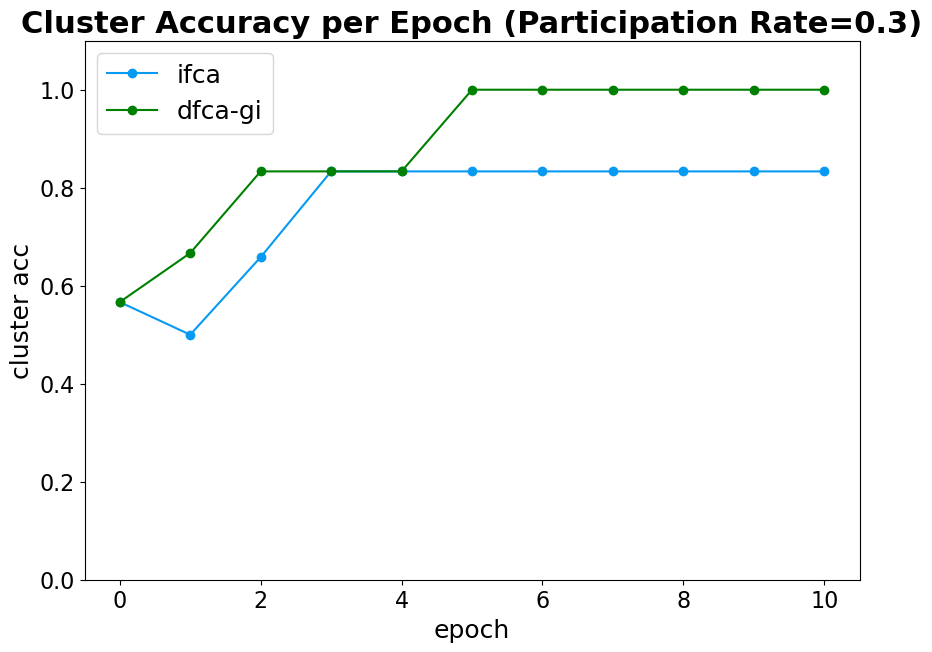

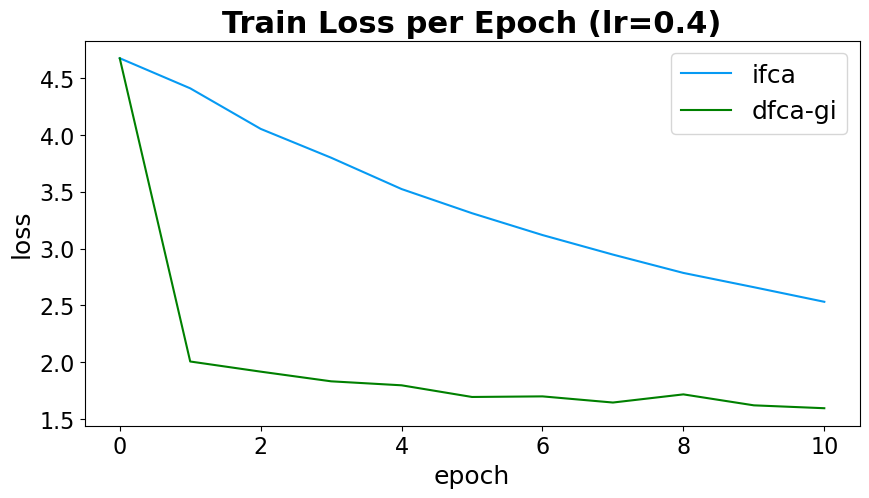

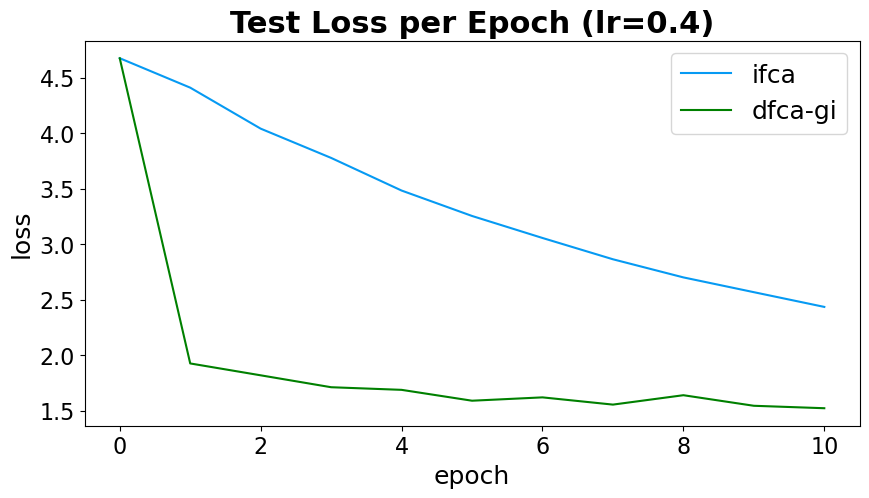

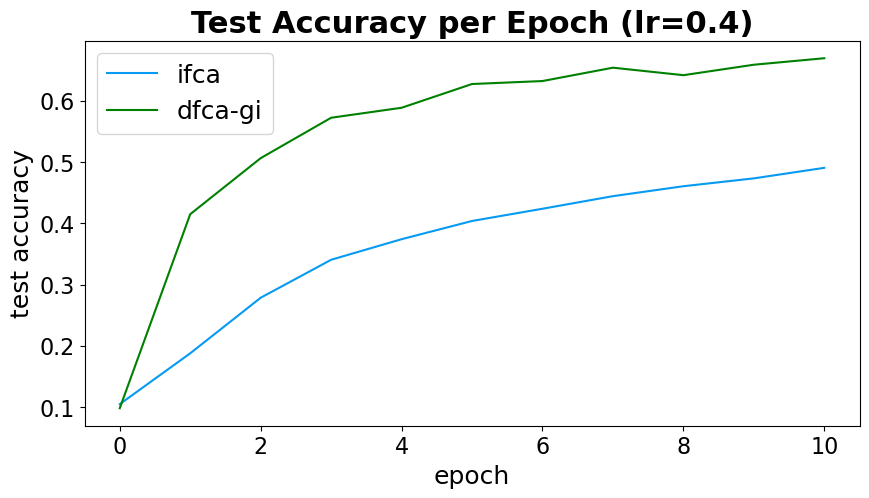

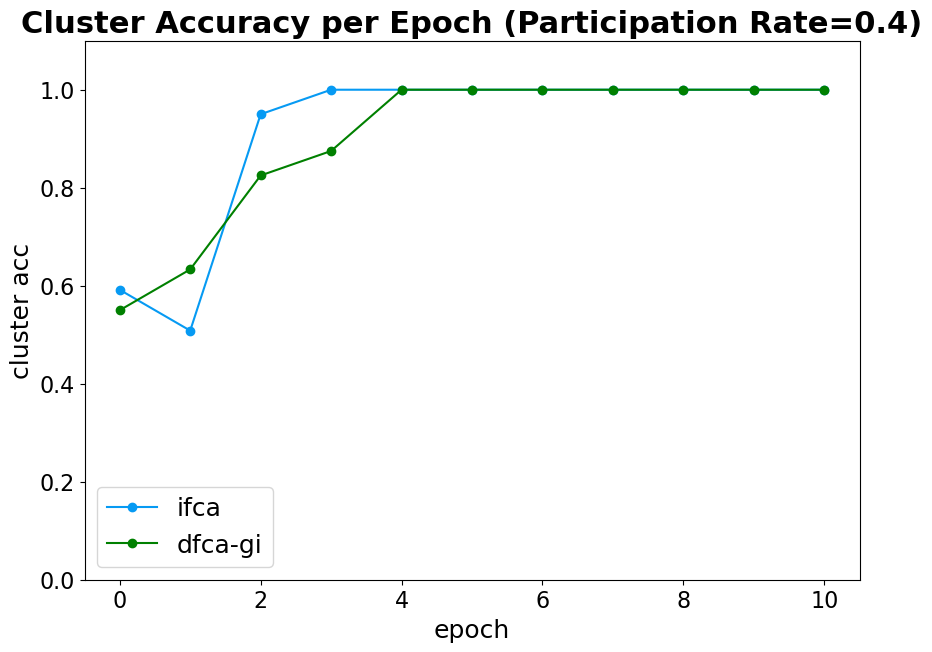

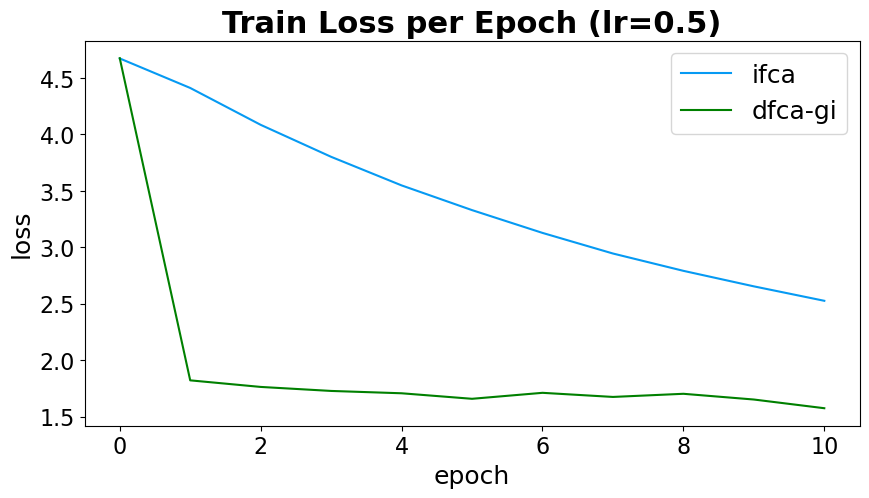

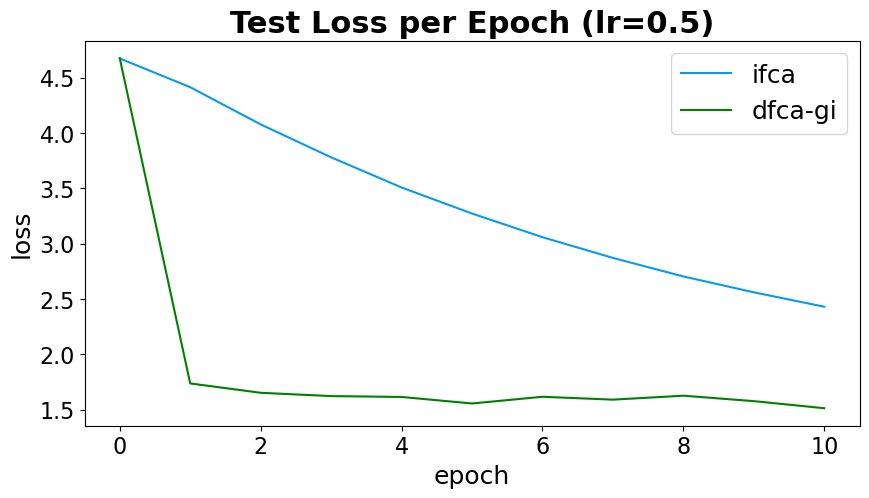

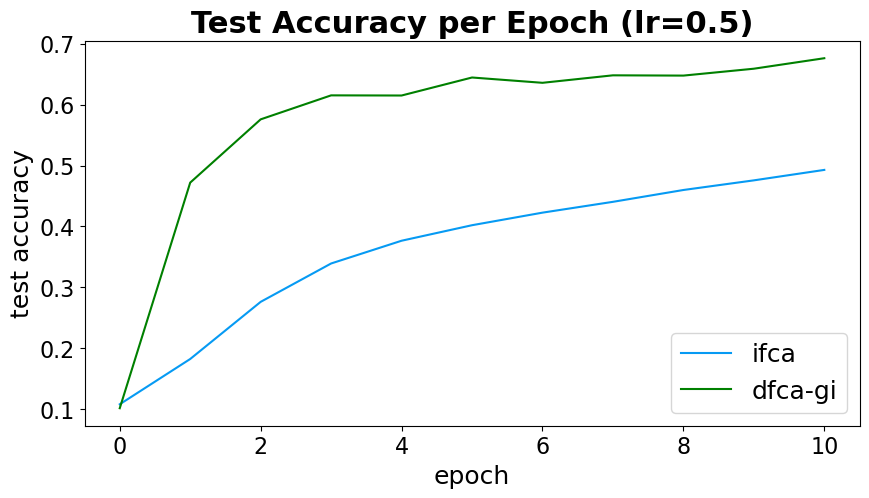

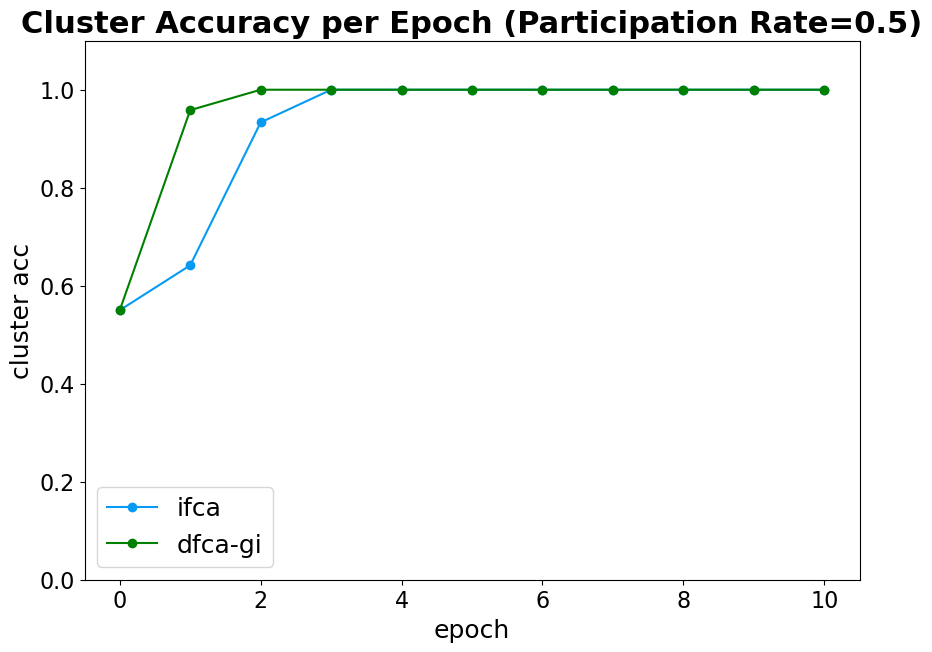

In [ ]:

r_ifca = {}
r_dfca_gi = {}

# print("IFCA Test Acc: ", ifca)
# print("DFCA-GI Test Acc: ", dfca_gi)

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
r_ifca['train_loss'] = []
for i in range(len(p_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])
    r_ifca['train_loss'].append(ifca[i][3])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(p_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

print("DFCA-GI Test Acc: ", r_dfca_gi['test_acc'])
print("IFCA Test Acc: ", r_ifca['test_acc'])

os.makedirs('graphs', exist_ok=True)

for l in range(len(p_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['train_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Train Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    # plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    # plt.title(f'Cluster Accuracy per Epoch (Participation Rate={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', f'cluster_acc_pn_{p_rates[l]}.png'))

